In [406]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

In [407]:
x = pd.read_csv("x.csv")
y = pd.read_csv("y.csv")

In [408]:
x.drop('Unnamed: 0', axis =1, inplace = True)
y.drop('Unnamed: 0', axis =1, inplace = True)

In [409]:
x.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,journey_day,journey_month,Dep_hour,dep_min,Arrival_hour,Arrival_minute,duration_hours,duration_mins
0,0.272727,0.00,1.0,0.141732,1.00,0.888889,0.884615,0.000000,0.956522,0.363636,0.043478,0.181818,0.042553,0.909091
1,0.090909,0.75,0.0,0.661417,0.25,0.888889,0.000000,0.666667,0.217391,0.909091,0.565217,0.272727,0.148936,0.454545
2,0.363636,0.50,0.2,0.929134,0.25,0.888889,0.307692,1.000000,0.391304,0.454545,0.173913,0.454545,0.404255,0.000000
3,0.272727,0.75,0.0,0.716535,0.00,0.888889,0.423077,0.666667,0.782609,0.090909,1.000000,0.545455,0.106383,0.454545
4,0.272727,0.00,1.0,0.228346,0.00,0.888889,0.000000,0.000000,0.695652,0.909091,0.913043,0.636364,0.085106,0.818182


In [410]:
from sklearn.model_selection import train_test_split,cross_val_score

In [411]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [412]:
#importing models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor


In [413]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [414]:
#Creating list of models and another list mapped to their names
models=[KNeighborsRegressor(),LinearRegression(),Ridge(),DecisionTreeRegressor(),Lasso(),
       RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]

names=['KNeighborsRegressor','LinearRegression','Ridge','DecisionTreeRegressor','Lasso',
       'RandomForestRegressor','AdaBoostRegressor','GradientBoostingRegressor']


In [415]:
def createmodels(model_list,xtrain,xtest,ytrain,ytest,n):
    name=[]
    meanabs=[]
    meansqd=[]
    rootmeansqd=[]
    r2=[]
    mcv=[]
    
    #Creating models
    for i,model in enumerate(model_list):
        model.fit(xtrain,ytrain)
        p=model.predict(xtest)
        score=cross_val_score(model,x,y,scoring='r2',cv=5)
        
        #Calculating scores of the model and appending them to a list
        name.append(n[i])
        meanabs.append(np.round(mean_absolute_error(p,ytest),4))
        meansqd.append(np.round(mean_squared_error(p,ytest),4))
        rootmeansqd.append(np.round(np.sqrt(mean_squared_error(p,ytest)),4))
        r2.append(np.round(r2_score(p,ytest),4))
    
    #Creating Dataframe
    data=pd.DataFrame()
    data['Model']=name
    data['Mean Absolute Error']=meanabs
    data['Mean Squared Error']=meansqd
    data['Root Mean Squared Error']=rootmeansqd
    data['R2 Score']=r2
    data.set_index('Model',inplace = True)
    return data   

In [416]:
print("------Performance of Training data--------")
createmodels(models, x_train,x_train,y_train,y_train,names)

------Performance of Training data--------


<ipython-input-415-7f11ba13efc1>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(xtrain,ytrain)
/Users/sujithasunkara/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sujithasunkara/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sujithasunkara/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score
Model,,,,
KNeighborsRegressor,1050.8989,3.885239e+06,1971.1010,0.7594
LinearRegression,2504.5534,1.273881e+07,3569.1474,-0.4323
Ridge,2504.6666,1.273886e+07,3569.1542,-0.4360
DecisionTreeRegressor,37.6891,8.278887e+04,287.7305,0.9962
Lasso,2504.0792,1.273909e+07,3569.1863,-0.4396
RandomForestRegressor,266.7853,4.267424e+05,653.2553,0.9787
AdaBoostRegressor,2755.4345,1.107739e+07,3328.2706,-0.0544
GradientBoostingRegressor,1219.5381,3.564790e+06,1888.0652,0.7753


In [417]:
print("------ Performance of validation data---------")
createmodels(models, x_train,x_valid,y_train,y_valid,names)

------ Performance of validation data---------


<ipython-input-415-7f11ba13efc1>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(xtrain,ytrain)
/Users/sujithasunkara/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sujithasunkara/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sujithasunkara/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score
Model,,,,
KNeighborsRegressor,1327.4434,4.895295e+06,2212.5314,0.7126
LinearRegression,2447.9560,1.127517e+07,3357.8518,-0.2239
Ridge,2447.9687,1.127442e+07,3357.7400,-0.2270
DecisionTreeRegressor,708.8581,3.752829e+06,1937.2219,0.8167
Lasso,2447.0218,1.127143e+07,3357.2952,-0.2297
RandomForestRegressor,654.3518,2.615225e+06,1617.1659,0.8618
AdaBoostRegressor,2900.0006,1.296467e+07,3600.6479,-0.3243
GradientBoostingRegressor,1219.5891,3.151896e+06,1775.3580,0.8052


Random Forest regressor got good score both in training and validation data

## Hyperparameter Tuning
Hyperparametertuning can be done by using two ways
1. Gridsearch CV
2. Randomized search CV

-Assign hyperparameters as dictionaries.
-Fit the model 
-select best parameters


In [418]:
model = RandomForestRegressor()

In [419]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Randomized search cv

In [420]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)


{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [421]:
## Randomsearchusing 5 fold cross validations
# search across 100 different combinations, and use all available cores
rf=RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 100, cv = 5, 
                      verbose=2, random_state=42, n_jobs = -1)

In [422]:
# Fit the random search model
rf.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   42.7s
/Users/sujithasunkara/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 22.2min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 28.7min finished
/Users/sujithasunkara/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [423]:
print(rf.best_estimator_)
print(rf.best_params_)
print(rf.best_score_)

RandomForestRegressor(bootstrap=False, max_depth=100, max_features='sqrt',
                      min_samples_split=5, n_estimators=800)
{'n_estimators': 800, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 100, 'bootstrap': False}
0.8827266075060327


In [425]:
predict = rf.predict(x_valid)

In [426]:
print('MAE:', np.round(mean_absolute_error(predict, y_valid),4))
print('MSE:', np.round(mean_squared_error(predict, y_valid),4))
print('RMSE:', np.round(np.sqrt(mean_squared_error(predict, y_valid)),4))
print('R2 score:', np.round(r2_score(predict, y_valid),2))

MAE: 734.6088
MSE: 2132548.6219
RMSE: 1460.3248
R2 score: 0.88


After Hyperparameter tuning for Random forest model , MAE, MSE and RMSE were decresed and R2 score incereased.

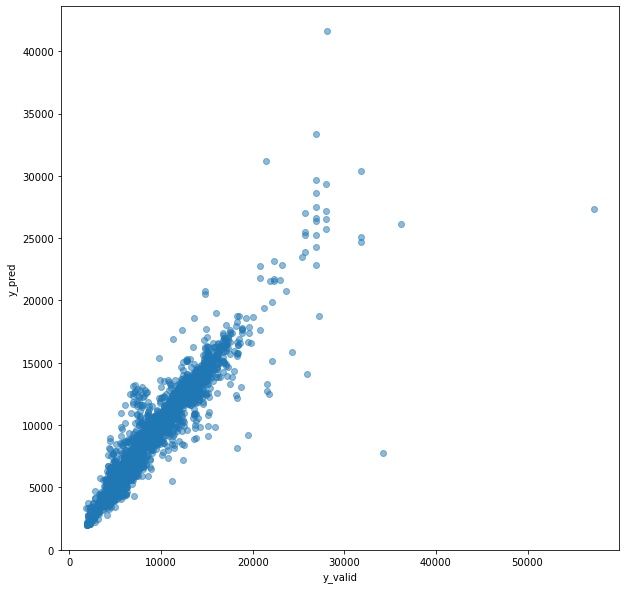

In [429]:
plt.figure(figsize = (10,10))
plt.scatter(y_valid, predict, alpha = 0.5)
plt.xlabel("y_valid")
plt.ylabel("y_pred")
plt.show()

In [438]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(rf, file)

In [439]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [440]:
y_prediction = forest.predict(x_valid)

## Predicting thevTest data

In [441]:
test = pd.read_csv(r"test.csv")

In [442]:
test.drop('Unnamed: 0', axis =1, inplace = True)

In [443]:
predictions = rf.predict(test)

In [444]:
predictions=pd.DataFrame(predictions,columns=['Price'])

In [445]:
predictions

,Price
0,14296.740104
1,5049.727500
2,12414.479687
3,9720.369687
4,3632.024375
...,...
2666,10138.704583
2667,5289.374896
2668,17681.361250
2669,12064.868125
